In [1]:
import pandas as pd
import numpy as np
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

raw_set = datasets.get_rdataset("deaths", package="MASS")
raw = raw_set.data

In [ ]:
df.sort_values()

In [6]:
display(raw.head())
print(len(raw))


,time,value
0,"1,974.00",3035
1,"1,974.08",2552
2,"1,974.17",2704
3,"1,974.25",2554
4,"1,974.33",2014


72


In [20]:
raw.time = pd.date_range('1974-01-01', periods=len(raw), freq='M')
raw['month'] = raw.time.dt.month

In [21]:
raw.head()

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5


,time,value,month
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11
71,1979-12-31,1915,12


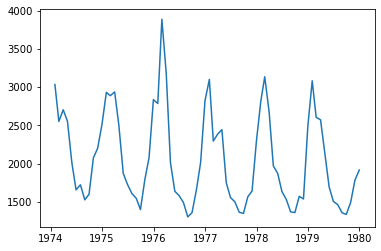

,Stationarity_adf
Test Statistics,-0.57
p-value,0.88
Used Lag,12.00
Used Observations,59.00
Critical Value(1%),-3.55
Maximum Information Criteria,841.38


,Stationarity_kpss
Test Statistics,0.65
p-value,0.02
Used Lag,12.00
Critical Value(10%),0.35


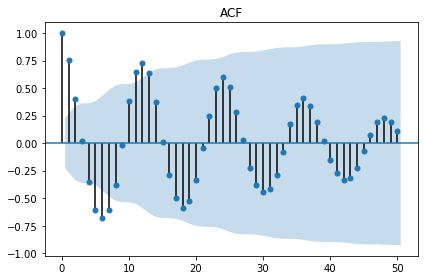

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           6.55e-21
Time:                        10:45:43   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

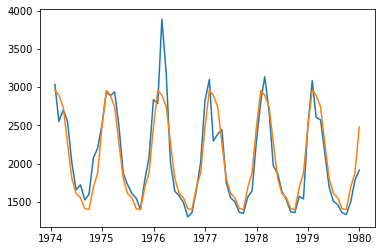

In [24]:
display(raw.tail())
plt.plot(raw.time, raw.value)
plt.show()

display(stationarity_adf_test(raw.value, []))
display(stationarity_kpss_test(raw.value, []))
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True, title='ACF')
plt.tight_layout()
plt.show()

result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=raw).fit()
display(result.summary())

plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show()

In [14]:
sm.tsa.stattools.adfuller(raw.value)
sm.tsa.stattools.kpss(raw.value)

(0.6519889937392281,
 0.017910091478251986,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [27]:
result.fittedvalues

0    2,959.33
1    2,894.67
2    2,743.00
3    2,269.67
4    1,805.17
       ...   
67   1,408.33
68   1,397.33
69   1,690.00
70   1,874.00
71   2,478.50
Length: 72, dtype: float64

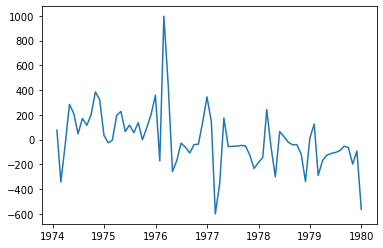

,Stationarity_adf
Test Statistics,-5.84
p-value,0.00
Used Lag,0.00
Used Observations,71.00
Critical Value(1%),-3.53
Maximum Information Criteria,812.36


,Stationarity_kpss
Test Statistics,0.54
p-value,0.03
Used Lag,12.00
Critical Value(10%),0.35


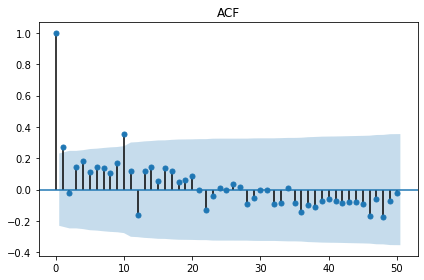

In [30]:
plt.plot(raw.time, result.resid)
plt.show()

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))
sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True, title='ACF')
plt.tight_layout()
plt.show()

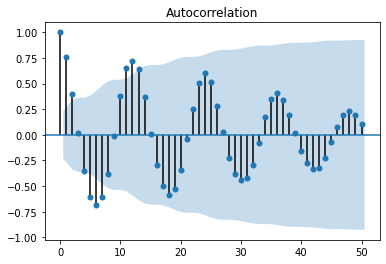

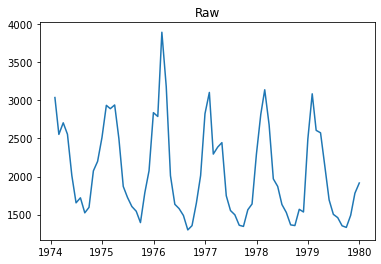

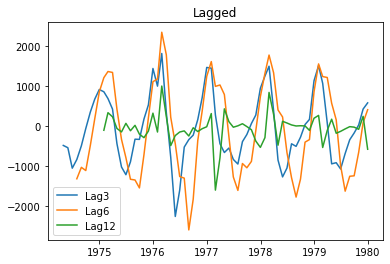

,Stationarity_adf
Test Statistics,-4.30
p-value,0.00
Used Lag,11.00
Used Observations,54.00
Critical Value(1%),-3.56
Maximum Information Criteria,786.67


,Stationarity_kpss
Test Statistics,0.35
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


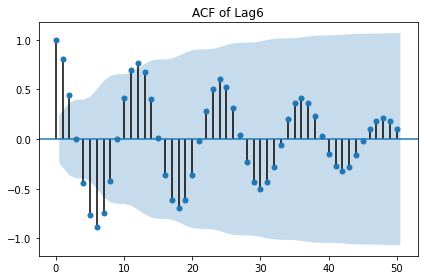

,Stationarity_adf
Test Statistics,-2.14
p-value,0.23
Used Lag,11.00
Used Observations,48.00
Critical Value(1%),-3.57
Maximum Information Criteria,703.72


,Stationarity_kpss
Test Statistics,0.09
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


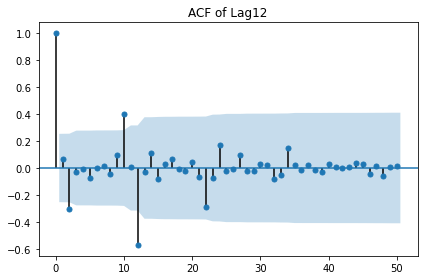

In [36]:
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.show()

plt.plot(raw.time, raw.value)
plt.title('Raw')
plt.show()
seasonal_lag = 3
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

seasonal_lag = 6
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, use_vlines=True,
                        title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

seasonal_lag = 12
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, use_vlines=True,
                        title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import seed, random
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

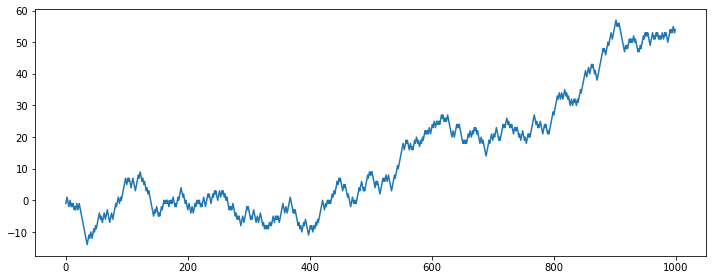

'Before a difference:'

,Stationarity_adf
Test Statistics,0.34
p-value,0.98
Used Lag,0.00
Used Observations,999.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,773.39"


,Stationarity_kpss
Test Statistics,3.75
p-value,0.01
Used Lag,22.00
Critical Value(10%),0.35


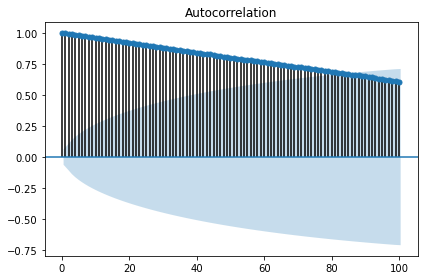

'After a diffrence:'

,Stationarity_adf
Test Statistics,-31.08
p-value,0.00
Used Lag,0.00
Used Observations,998.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,770.18"


,Stationarity_kpss
Test Statistics,0.22
p-value,0.10
Used Lag,22.00
Critical Value(10%),0.35


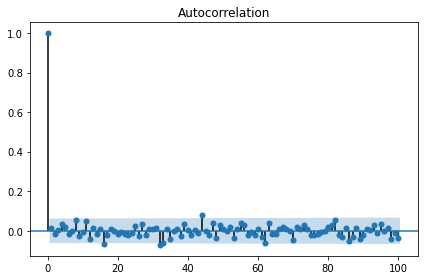

In [44]:
plt.figure(figsize=(10,4))
seed(1)
random_walk = [-1 if random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

display('Before a difference:')
display(stationarity_adf_test(random_walk, []))
display(stationarity_kpss_test(random_walk, []))
sm.graphics.tsa.plot_acf(random_walk, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

display('After a diffrence:')
display(stationarity_adf_test(pd.Series(random_walk).diff(1).dropna(), []))
display(stationarity_kpss_test(pd.Series(random_walk).diff(1).dropna(), []))
sm.graphics.tsa.plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

In [39]:
sm.tsa.stattools.adfuller(random_walk)

(0.34160454935399914,
 0.9791747967918744,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2773.394895844241)

In [40]:
sm.tsa.stattools.kpss(random_walk)

(3.746174038305406,
 0.01,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

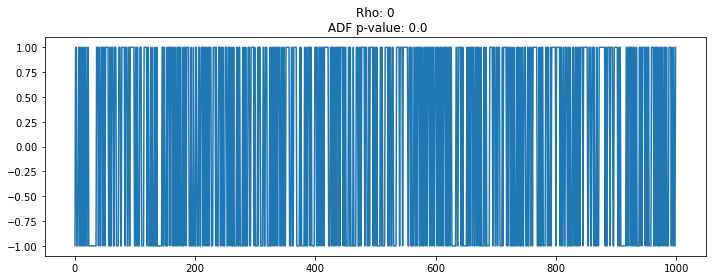

In [53]:
plt.figure(figsize=(10,4))
seed(1)
rho = 0
random_walk = [-1 if random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = rho * random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.title('Rho: {}\n ADF p-value: {}'.format(rho, np.ravel(stationarity_adf_test(random_walk, []))[1]))
plt.tight_layout()
plt.show()

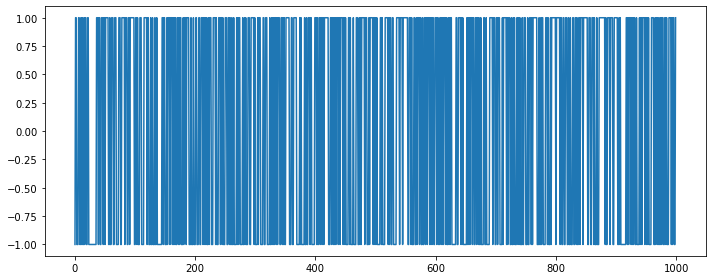

In [50]:
plt.figure(figsize=(10,4))
plt.plot(pd.Series(random_walk))
plt.tight_layout()
plt.show()

Optimal Lambda:  0.14802265137037945


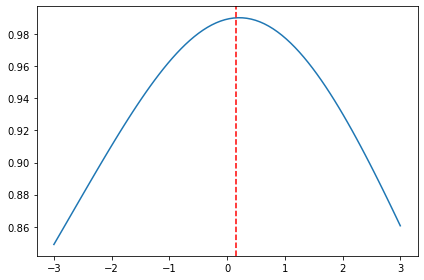

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

data = sm.datasets.get_rdataset('AirPassengers')
raw = data.data.copy()

x,y = sp.stats.boxcox_normplot(raw.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(raw.value)
print('Optimal Lambda: ', l_opt)

plt.plot(x, y)
plt.axvline(x=l_opt, color='r', ls="--")
plt.tight_layout()
plt.show()

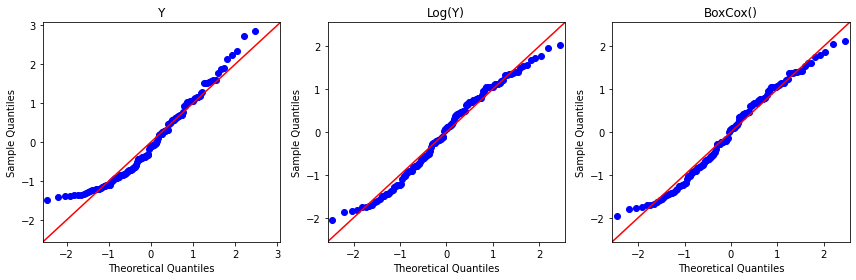

In [61]:
plt.figure(figsize=(12,4))
sm.qqplot(raw.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(raw.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title('BoxCox()')
plt.tight_layout()
plt.show()




In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

In [64]:
raw.head()

,time,value
0,"1,949.00",112
1,"1,949.08",118
2,"1,949.17",132
3,"1,949.25",129
4,"1,949.33",121


In [66]:
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

In [67]:
raw.head()

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


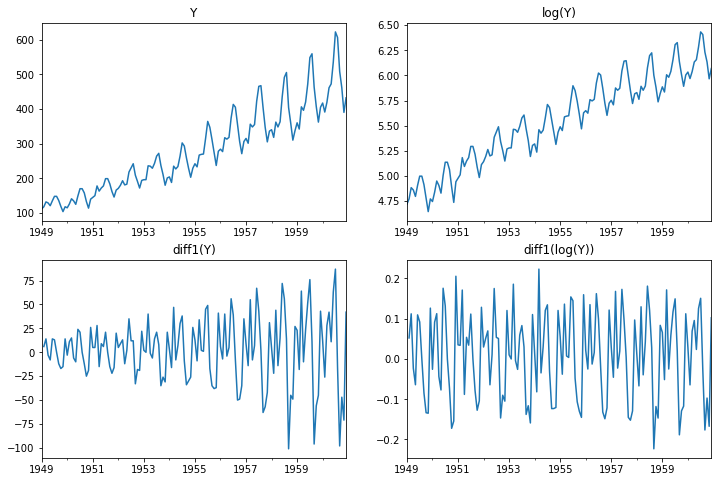

In [68]:
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

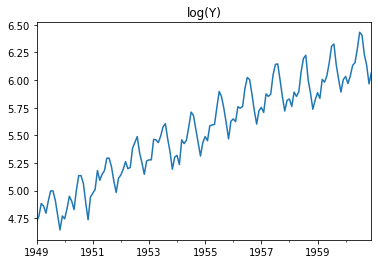

In [71]:
np.log(raw.value).plot(title='log(Y)', legend=False)

'Non_transfer:'

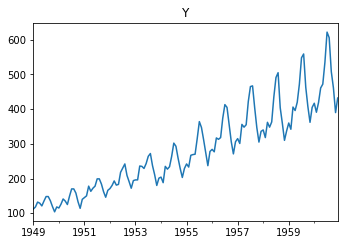

In [72]:
display('Non_transfer:')
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

In [73]:
candidate_none = raw.copy()


In [78]:
candidate_none.value

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: value, Length: 144, dtype: int64

In [77]:
candidate_none.values

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


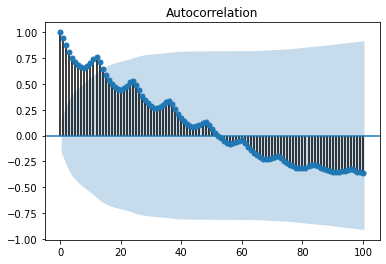

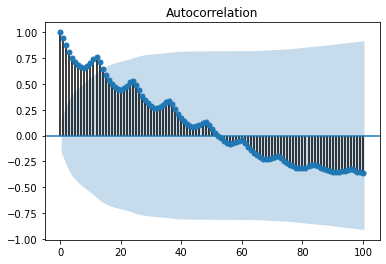

In [81]:
display(stationarity_adf_test(candidate_none.value, []))
display(stationarity_kpss_test(candidate_none.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_none.values.flatten(), lags=100, use_vlines=True)

'Log transfer:'

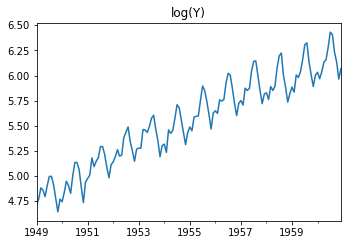

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


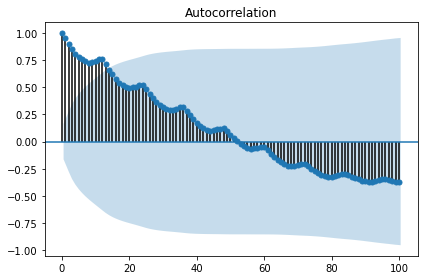

In [82]:
display('Log transfer:')
plt.figure(figsize=(12,8))
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
plt.show()

candidate_trend = np.log(raw).copy()
display(stationarity_adf_test(candidate_trend.values.flatten(), []))
display(stationarity_kpss_test(candidate_trend.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()


In [83]:
trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T

In [84]:
result

,Test Statistics,p-value,Used Lag,Used Observations,Critical Value(1%),Maximum Information Criteria
Stationarity_adf,-1.72,0.42,13.00,130.00,-3.48,-445.40


Trend Difference:  1


'Log and trend diffence transfer:'

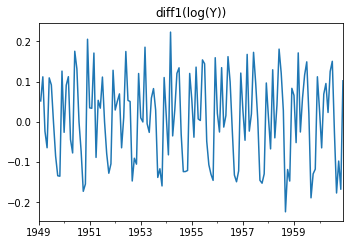

In [89]:
if result['p-value'].values.flatten() < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

display('Log and trend diffence transfer:')
plt.figure(figsize=(12,8))
np.log(raw).diff(trend_diff_order).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36


,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


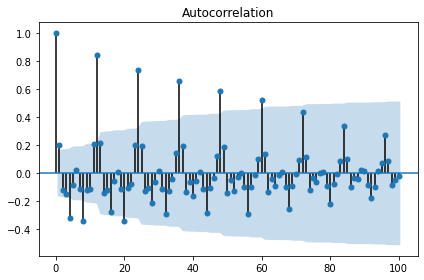

In [91]:
candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_seasonal.values.flatten(),[]))
display(stationarity_kpss_test(candidate_seasonal.value, []))
sm.graphics.tsa.plot_acf(candidate_seasonal.values.flatten(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

Seasonal Difference:  12


'Log and trend+seasonal diffrence transfer:'

,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56


,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


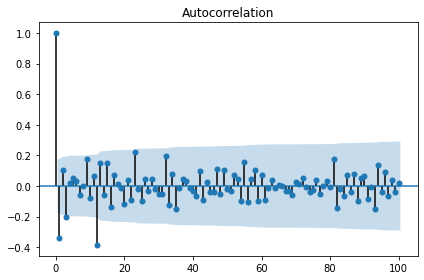

In [98]:
seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
print('Seasonal Difference: ', seasonal_diff_order)

display('Log and trend+seasonal diffrence transfer:')
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(),[]))
display(stationarity_kpss_test(candidate_final.value, []))
sm.graphics.tsa.plot_acf(candidate_final.values.flatten(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()



In [96]:
sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1

12

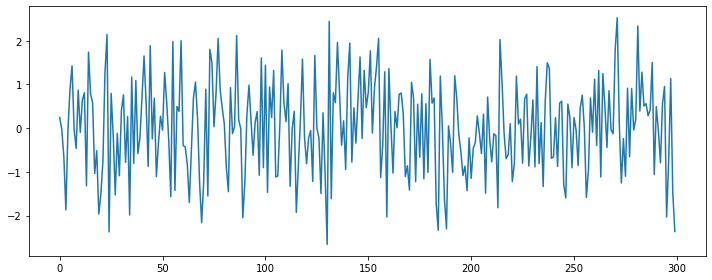

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(stats.norm.rvs(size=300))
plt.tight_layout()
plt.show()

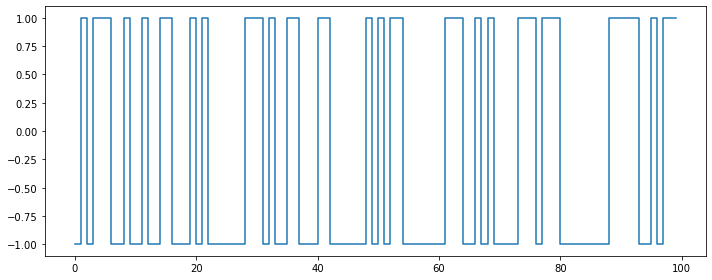

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
samples = stats.bernoulli.rvs(0.5, size=100) * 2 -1
plt.step(np.arange(len(samples)), samples)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

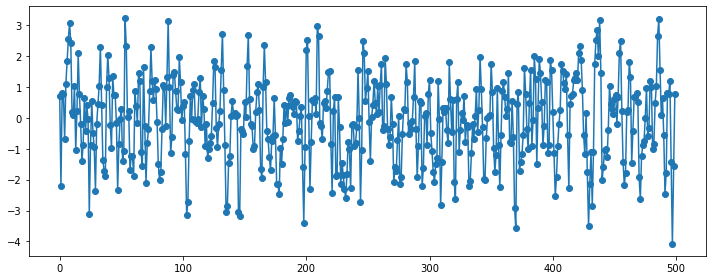

In [24]:
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

In [20]:
ma2 = np.c_[[1], [ma_params]]
ma2

array([[1. , 0.9]])

In [21]:
ma2 = np.c_[1, ma_params]
ma2

array([[1. , 0.9]])

In [23]:
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ma

array([1. , 0.9])

<ipython-input-25-fa3ea5e84da5>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))


Text(0.5, 1.0, 'Theoretical autocorrelation function of an ARMA process')

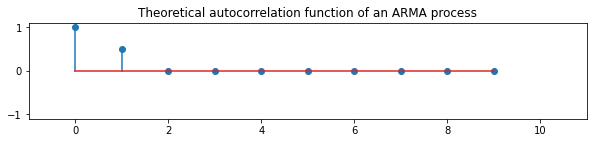

In [25]:
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

In [26]:
sm.tsa.ArmaProcess(ar, ma).acf(lags=10)

array([1.        , 0.49723757, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

<ipython-input-28-430f8876c8c0>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))


Text(0.5, 1.0, 'Theretical partial autocorrelation function of an ARMA process')

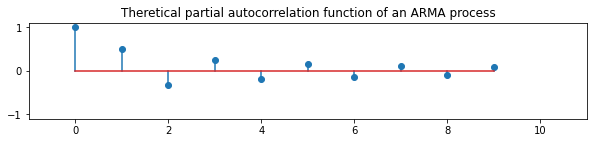

In [28]:
plt.figure(figsize=(10, 6))
plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theretical partial autocorrelation function of an ARMA process")

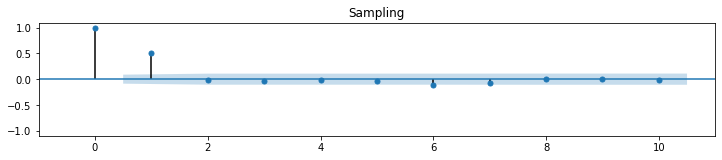

In [31]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling")
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


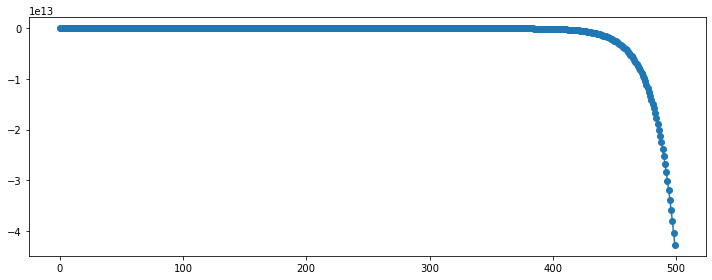

In [82]:
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.4, 0.7])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()



In [80]:
ar

array([1. , 0.4, 0.6])

<ipython-input-37-dce689535898>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))


Text(0.5, 1.0, 'autocorrelation')

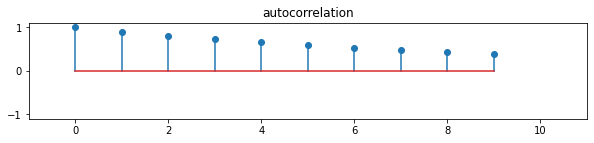

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("autocorrelation")

<ipython-input-39-6cd451874afc>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))


Text(0.5, 1.0, 'partial autocorrelation')

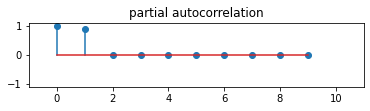

In [39]:
plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("partial autocorrelation")

<Figure size 720x432 with 0 Axes>

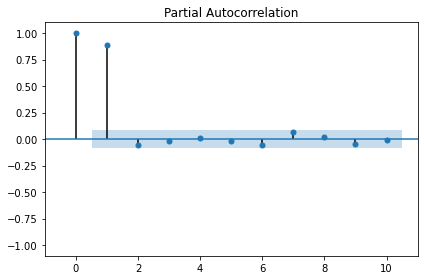

In [44]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(y, lags=10, use_vlines=True)
plt.xlim(-1,11)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

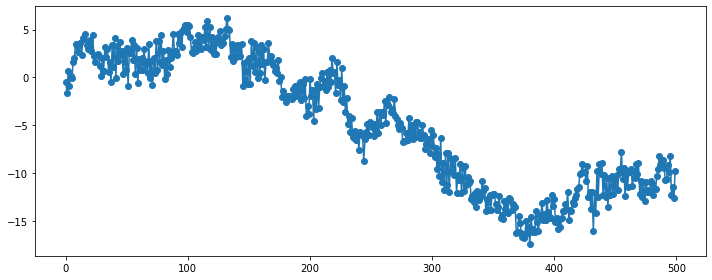

In [83]:
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.5, -0.3, 0.4, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

In [75]:
ar

array([ 1.  , -0.5 , -0.25,  0.3 , -0.4 ,  0.1 ])

In [4]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

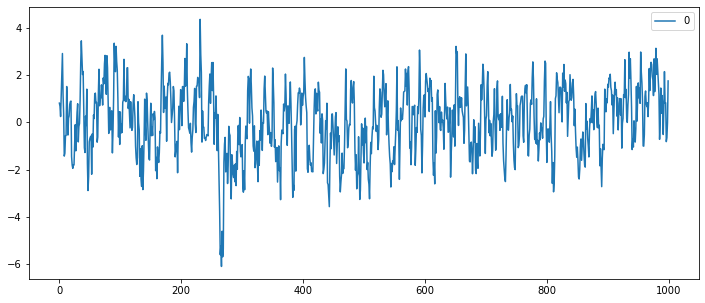

In [6]:
### ARMA(1,0) = AR(1)
# Setting
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([])
index_name = ['const', 'ar(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
# forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead_1)]
# pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
# ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
#                 pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
#                 pd.DataFrame(preds_ts_interval, )

In [9]:
pred_ts_point

array([1.31642618, 0.99420832, 0.75336637, 0.57334891, 0.43879474,
       0.33822214, 0.26304909, 0.20686094, 0.16486307, 0.13347174,
       0.11000827, 0.09247048, 0.07936186, 0.0695638 , 0.06224024,
       0.05676624, 0.0526747 , 0.04961647, 0.04733059, 0.04562201,
       0.04434494, 0.04339038, 0.0426769 , 0.04214361, 0.041745  ,
       0.04144706, 0.04122436, 0.04105791, 0.04093349, 0.0408405 ,
       0.04077099, 0.04071903, 0.0406802 , 0.04065118, 0.04062948,
       0.04061326, 0.04060114, 0.04059208, 0.04058531, 0.04058025,
       0.04057647, 0.04057364, 0.04057152, 0.04056994, 0.04056876,
       0.04056788, 0.04056722, 0.04056673, 0.04056636, 0.04056608,
       0.04056588, 0.04056572, 0.04056561, 0.04056552, 0.04056546,
       0.04056541, 0.04056537, 0.04056535, 0.04056533, 0.04056531,
       0.0405653 , 0.04056529, 0.04056529, 0.04056528, 0.04056528,
       0.04056528, 0.04056527, 0.04056527, 0.04056527, 0.04056527,
       0.04056527, 0.04056527, 0.04056527, 0.04056527, 0.04056

In [8]:
pred_ts_interval

array([[-0.56276932,  3.19562167],
       [-1.35191473,  3.34033137],
       [-1.81695031,  3.32368305],
       [-2.11408982,  3.26078763],
       [-2.31190754,  3.18949702],
       [-2.44719883,  3.12364311],
       [-2.54158148,  3.06767965],
       [-2.60844463,  3.02216651],
       [-2.65638884,  2.98611499],
       [-2.69109684,  2.95804032],
       [-2.71641158,  2.93642812],
       [-2.73498311,  2.91992408],
       [-2.74866911,  2.90739282],
       [-2.75878968,  2.89791729],
       [-2.76629341,  2.89077389],
       [-2.77186806,  2.88540054],
       [-2.77601584,  2.88136523],
       [-2.77910548,  2.87833841],
       [-2.78140891,  2.87607009],
       [-2.78312729,  2.87437132],
       [-2.78440984,  2.87309972],
       [-2.78536746,  2.87214823],
       [-2.78608265,  2.87143645],
       [-2.7866169 ,  2.87090412],
       [-2.78701604,  2.87050604],
       [-2.78731428,  2.8702084 ],
       [-2.78753714,  2.86998587],
       [-2.78770369,  2.86981951],
       [-2.78782816,

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2775.2536
Dependent Variable: y                Log-Likelihood:      -1377.3  
Date:               2021-01-11 07:39 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       998                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     5.0000           HQIC:                2766.126 
AIC:                2760.5304                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0406     0.1197    0.3389   0.7347   -0.1940   0.2752
ar.L1.y       0.7475     0.0210   35.6193   0.0000    0.7063   0.7886
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3379             0.0000           1.3379             0.0000
===================================================================

"""

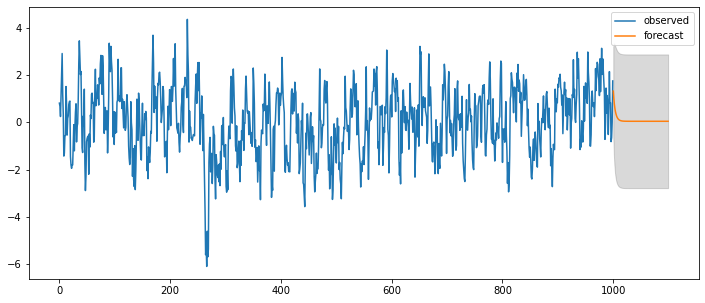

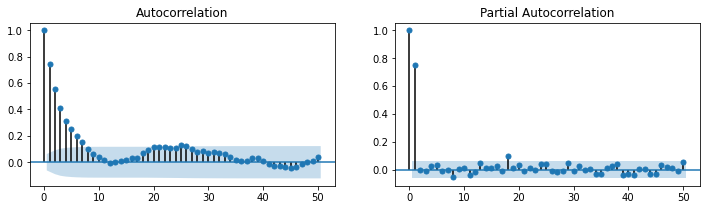

In [13]:
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
                pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()
                                    

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2781.5944
Dependent Variable: y                Log-Likelihood:      -1377.0  
Date:               2021-01-11 07:56 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       997                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     5.0000           HQIC:                2769.424 
AIC:                2761.9633                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0193     0.0592    0.3255   0.7448   -0.0967    0.1352
ar.L1.y      0.7557     0.0305   24.7647   0.0000    0.6959    0.8155
ar.L2.y     -0.2678     0.0305   -8.7791   0.0000   -0.3276   -0.2080
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.4111            -1.3203           1.9324            -0.1197
AR.2           1.4111             1.3203           1.9324             0.1197
===================================================================

"""

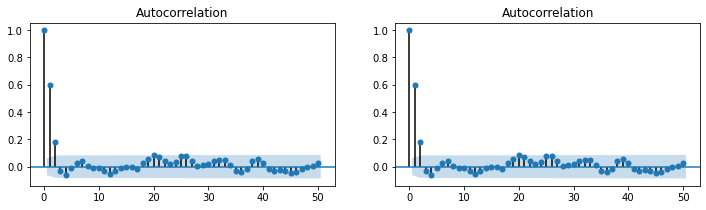

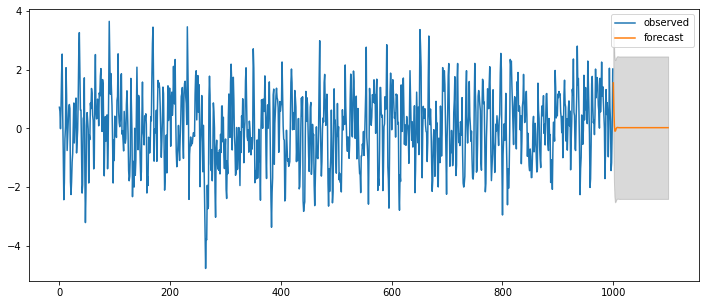

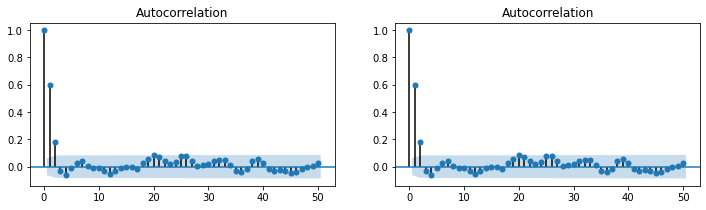

In [16]:
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([])
index_name = ['sonst', 'ar(1)', 'ar(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))

In [ ]:
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)

,0,1
1000,-0.562769,3.195622
1001,-1.351915,3.340331
1002,-1.816950,3.323683
1003,-2.114090,3.260788
1004,-2.311908,3.189497
...,...,...
1095,-2.788196,2.869327
1096,-2.788196,2.869327
1097,-2.788196,2.869327
1098,-2.788196,2.869327


In [18]:
pd.DataFrame(y).index.max()

999

In [19]:
pd.DataFrame(y).index.max()+ahead

1099

In [20]:
ahead

100

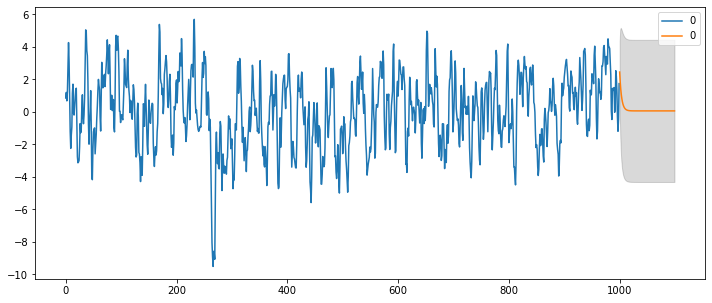

In [25]:
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([0.65])
index_name = ['const', 'ar(1)', 'ma(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)

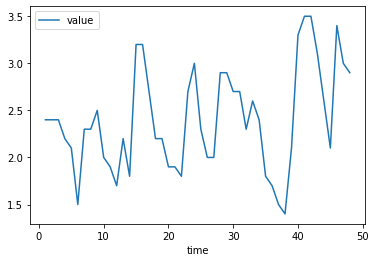

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = sm.datasets.get_rdataset("lh")
raw = data.data
raw.plot(x="time", y="value")
plt.show()

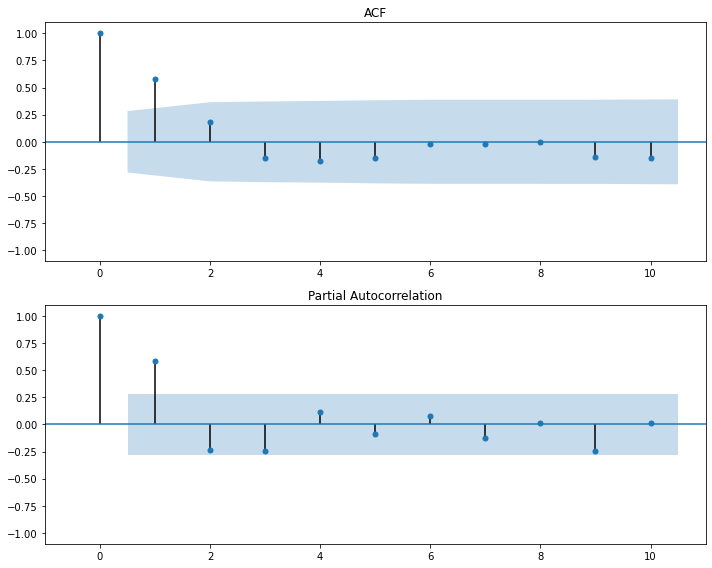

In [28]:
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(raw.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

In [29]:
fit = sm.tsa.ARMA(raw.value, (0,1)).fit()
display(fit.summary())

fit = sm.tsa.ARMA(raw.value, (1,0)).fit()
display(fit.summary())

fit = sm.tsa.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(0, 1)   Log Likelihood                 -31.052
Method:                       css-mle   S.D. of innovations              0.461
Date:                Mon, 11 Jan 2021   AIC                             68.104
Time:                        08:24:14   BIC                             73.717
Sample:                             0   HQIC                            70.225
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4050      0.098     24.576      0.000       2.213       2.597
ma.L1.value     0.4810      0.094      5.093      0.000       0.296       0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0790           +0.0000j            2.0790            0.5000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 -29.379
Method:                       css-mle   S.D. of innovations              0.444
Date:                Mon, 11 Jan 2021   AIC                             64.758
Time:                        08:24:14   BIC                             70.372
Sample:                             0   HQIC                            66.880
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4133      0.147     16.460      0.000       2.126       2.701
ar.L1.value     0.5739      0.116      4.939      0.000       0.346       0.802
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7424           +0.0000j            1.7424            0.0000
-----------------------------------------------------------------------------
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                 -28.762
Method:                       css-mle   S.D. of innovations              0.439
Date:                Mon, 11 Jan 2021   AIC                             65.524
Time:                        08:24:14   BIC                             73.009
Sample:                             0   HQIC                            68.353
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4101      0.136     17.754      0.000       2.144       2.676
ar.L1.value     0.4522      0.177      2.556      0.011       0.105       0.799
ma.L1.value     0.1982      0.171      1.162      0.245      -0.136       0.532
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2114           +0.0000j            2.2114            0.0000
MA.1           -5.0462           +0.0000j            5.0462            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

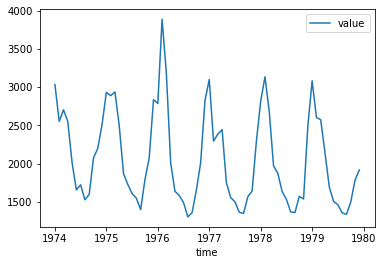

In [35]:
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.plot(x="time", y="value")
plt.show()

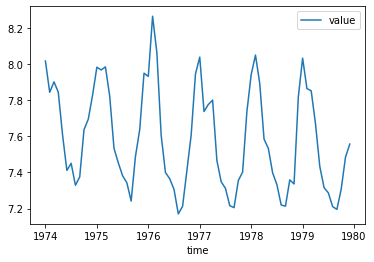

In [33]:
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x="time", y="value")
plt.show()

In [34]:
raw

,time,value
0,1974.000000,8.017967
1,1974.083333,7.844633
2,1974.166667,7.902487
3,1974.250000,7.845416
4,1974.333333,7.607878
...,...,...
67,1979.583333,7.210818
68,1979.666667,7.195187
69,1979.750000,7.307873
70,1979.833333,7.484930


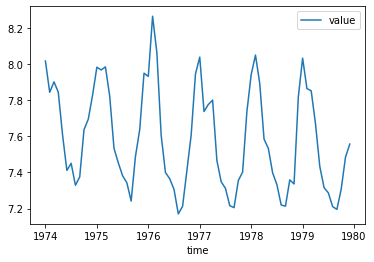

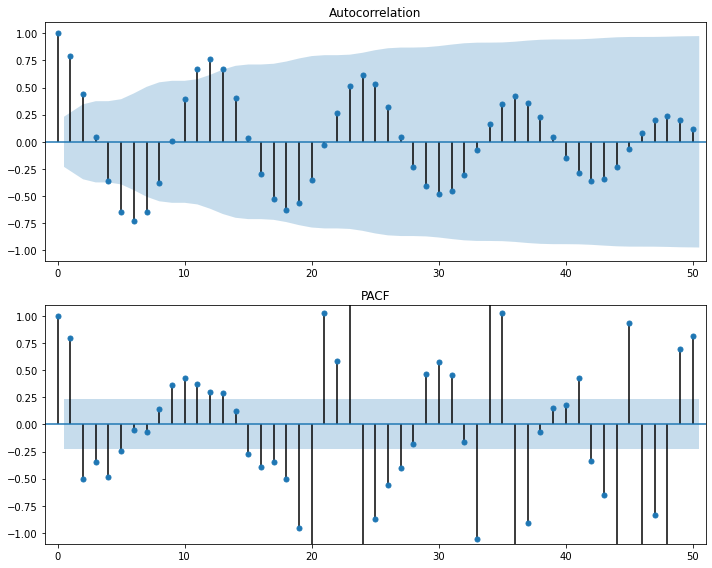

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                     ARMA(1, 1)   Log Likelihood                  31.983
Method:                       css-mle   S.D. of innovations              0.154
Date:                Mon, 11 Jan 2021   AIC                            -55.965
Time:                        08:40:48   BIC                            -46.859
Sample:                             0   HQIC                           -52.340
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6037      0.080     94.470      0.000       7.446       7.761
ar.L1.value     0.6796      0.098      6.970      0.000       0.489       0.871
ma.L1.value     0.4680      0.111      4.214      0.000       0.250       0.686
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4713           +0.0000j            1.4713            0.0000
MA.1           -2.1369           +0.0000j            2.1369            0.5000
-----------------------------------------------------------------------------
"""

In [40]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time', y='value')
plt.show()

plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(raw.value, use_vlines=True, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)

sm.graphics.tsa.plot_pacf(raw.value, lags=50, use_vlines=True, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

fit = sm.tsa.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

In [41]:
from itertools import product

result = []
for p, q in product(range(4), range(2)):
    if (p == 0 & q == 0):
        continue
    model = sm.tsa.ARMA(raw.value, (p, q)).fit()
    try:
        result.append({"p":p, "q":q, "LLF":model.llf, "AIC":model.aic, "BIC":model.bic})
    except:
        pass

In [42]:
result

[{'p': 1,
  'q': 0,
  'LLF': 24.894296853696744,
  'AIC': -43.78859370739349,
  'BIC': -36.95859535034532},
 {'p': 1,
  'q': 1,
  'LLF': 31.98260174264125,
  'AIC': -55.9652034852825,
  'BIC': -46.858539009218276},
 {'p': 2,
  'q': 0,
  'LLF': 35.739121636678604,
  'AIC': -63.47824327335721,
  'BIC': -54.37157879729298},
 {'p': 2,
  'q': 1,
  'LLF': 44.51288024197474,
  'AIC': -79.02576048394948,
  'BIC': -67.6424298888692},
 {'p': 3,
  'q': 0,
  'LLF': 38.560199855578716,
  'AIC': -67.12039971115743,
  'BIC': -55.73706911607715},
 {'p': 3,
  'q': 1,
  'LLF': 45.27995665641417,
  'AIC': -78.55991331282834,
  'BIC': -64.899916598732}]

In [44]:
result = pd.DataFrame(result)
display(result)
opt_ar = result.iloc[np.argmin(result['AIC']), 0]
opt_ma = result.iloc[np.argmin(result['AIC']), 1]

,p,q,LLF,AIC,BIC
0,1,0,24.894297,-43.788594,-36.958595
1,1,1,31.982602,-55.965203,-46.858539
2,2,0,35.739122,-63.478243,-54.371579
3,2,1,44.512880,-79.025760,-67.642430
4,3,0,38.560200,-67.120400,-55.737069
5,3,1,45.279957,-78.559913,-64.899917


In [45]:
opt_ar

2

In [46]:
opt_ma

1

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                     ARMA(2, 1)   Log Likelihood                  44.513
Method:                       css-mle   S.D. of innovations              0.128
Date:                Mon, 11 Jan 2021   AIC                            -79.026
Time:                        09:08:46   BIC                            -67.642
Sample:                             0   HQIC                           -74.494
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.5920      0.020    384.993      0.000       7.553       7.631
ar.L1.value     1.6407      0.059     27.830      0.000       1.525       1.756
ar.L2.value    -0.8787      0.055    -16.027      0.000      -0.986      -0.771
ma.L1.value    -0.7021      0.075     -9.363      0.000      -0.849      -0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9336           -0.5162j            1.0668           -0.0804
AR.2            0.9336           +0.5162j            1.0668            0.0804
MA.1            1.4243           +0.0000j            1.4243            0.0000
-----------------------------------------------------------------------------
"""

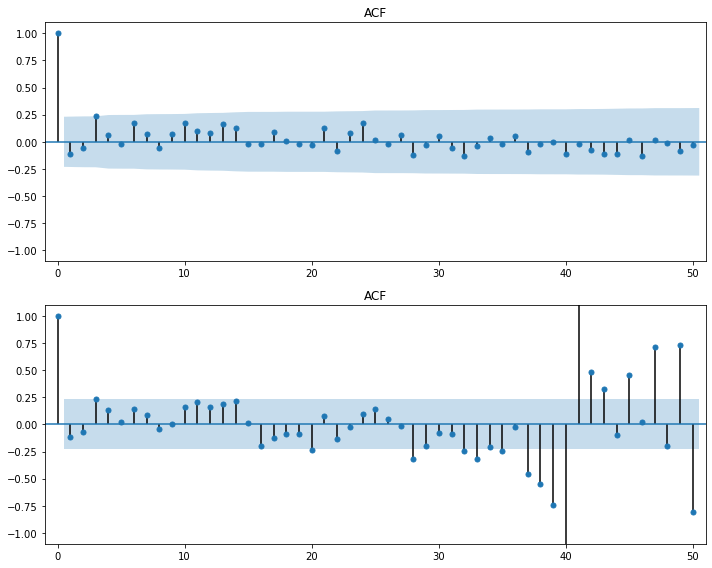

In [49]:
fit = sm.tsa.ARMA(raw.value, (2,1)).fit()
display(fit.summary())

plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")
plt.tight_layout()

In [6]:
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

source_url = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
raw = pd.read_stata(BytesIO(source_url))

In [7]:
raw

,m2,time,m1,consump,pc92
0,NaN,1946-01-01,NaN,134.899994,NaN
1,NaN,1946-04-01,NaN,140.100006,NaN
2,NaN,1946-07-01,NaN,148.899994,NaN
3,NaN,1946-10-01,NaN,153.199997,NaN
4,NaN,1947-01-01,NaN,156.600006,912.099976
...,...,...,...,...,...
206,3979.270020,1997-07-01,1063.550049,5540.299805,4947.000000
207,4046.389893,1997-10-01,1076.040039,5593.200195,4981.000000
208,4133.879883,1998-01-01,1081.109985,5676.500000,5055.100098
209,4196.100098,1998-04-01,1074.520020,5773.700195,5130.200195


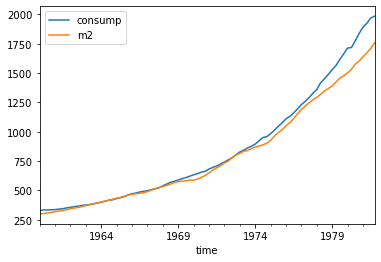

In [8]:
raw.index = raw.time
raw_using = raw.loc['1960':'1981', ["consump", "m2"]]
raw_using.plot()
plt.show()

In [9]:
raw_using

,consump,m2
time,,
1960-01-01,327.299988,299.350006
1960-04-01,333.200012,302.329987
1960-07-01,333.100006,308.450012
1960-10-01,335.000000,312.369995
1961-01-01,335.700012,318.290009
...,...,...
1980-10-01,1836.800049,1601.099976
1981-01-01,1890.300049,1638.000000
1981-04-01,1923.500000,1670.550049


In [11]:
fit = sm.OLS(raw_using.consump, sm.add_constant(raw_using.m2)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consump   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          7.72e-101
Time:                        08:46:49   Log-Likelihood:                -434.48
No. Observations:                  88   AIC:                             873.0
Df Residuals:                      86   BIC:                             877.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.7547      7.788     -7.930      0.000     -77.237     -46.273
m2             1.1406      0.009    131.182      0.000       1.123       1.158
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.669
Skew:                           0.213   Prob(JB):                        0.716
Kurtosis:                       2.984   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

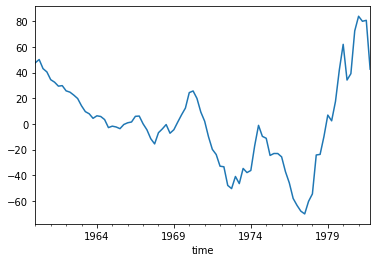

In [12]:
fit.resid.plot()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


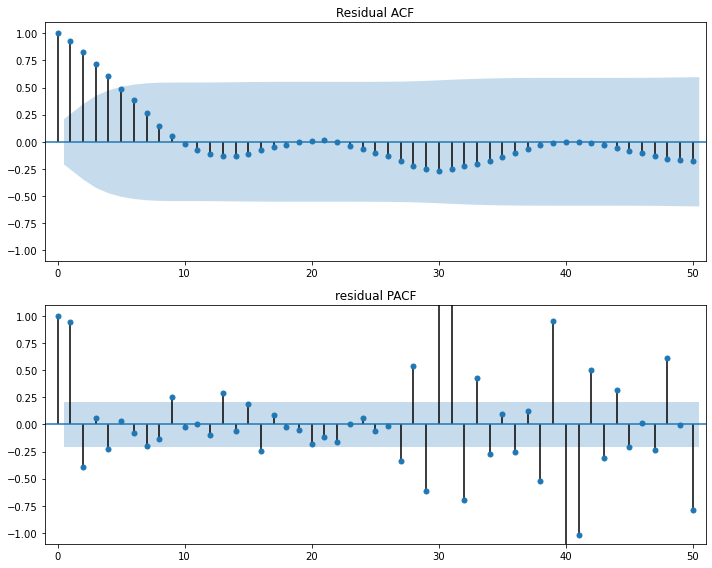

In [15]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, use_vlines=True, ax=plt.subplot(211))
plt.xlim(-1,51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, use_vlines=True, ax=plt.subplot(212))
plt.xlim(-1,51)
plt.ylim(-1.1, 1.1)
plt.title("residual PACF")
plt.tight_layout()
plt.show()

In [16]:
fit = sm.tsa.ARMA(raw_using.consump, (1,1), exog=raw_using.m2).fit()
display(fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                consump   No. Observations:                   88
Model:                     ARMA(1, 1)   Log Likelihood                -327.699
Method:                       css-mle   S.D. of innovations              9.873
Date:                Tue, 12 Jan 2021   AIC                            665.398
Time:                        08:53:55   BIC                            677.784
Sample:                    01-01-1960   HQIC                           670.388
                         - 10-01-1981                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -37.6120     36.044     -1.044      0.297    -108.257      33.032
m2                1.1232      0.034     33.282      0.000       1.057       1.189
ar.L1.consump     0.9330      0.043     21.866      0.000       0.849       1.017
ma.L1.consump     0.3106      0.116      2.682      0.007       0.084       0.538
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0718           +0.0000j            1.0718            0.0000
MA.1           -3.2199           +0.0000j            3.2199            0.5000
-----------------------------------------------------------------------------
"""

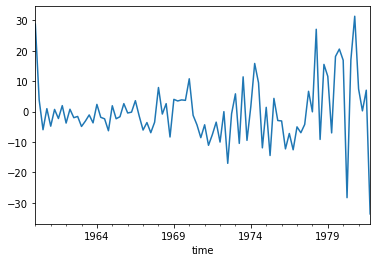

In [17]:
fit.resid.plot()
plt.show()

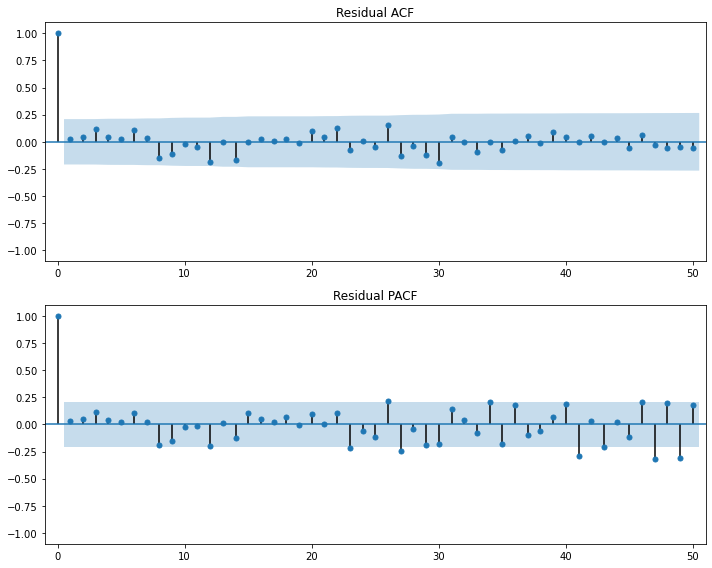

In [19]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             consump   No. Observations:                   88
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 4)   Log Likelihood                -336.101
Date:                             Tue, 12 Jan 2021   AIC                            680.202
Time:                                     09:02:26   BIC                            690.111
Sample:                                 01-01-1960   HQIC                           684.194
                                      - 10-01-1981                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.003    354.300      0.000       0.993       1.004
ar.S.L4        0.9689      0.033     29.086      0.000       0.904       1.034
ma.S.L4       -0.3828      0.108     -3.534      0.000      -0.595      -0.171
sigma2        96.8871      9.303     10.415      0.000      78.654     115.120
===================================================================================
Ljung-Box (Q):                       62.57   Jarque-Bera (JB):               141.02
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              21.04   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

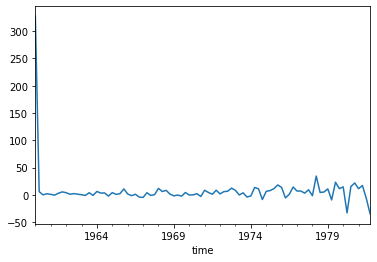

In [20]:
fit = sm.tsa.SARIMAX(raw_using.consump, exop= raw_using.m2, order=(1,0,0), seasonal_order=(1,0,1,4)).fit()
display(fit.summary())

fit.resid.plot()
plt.show()



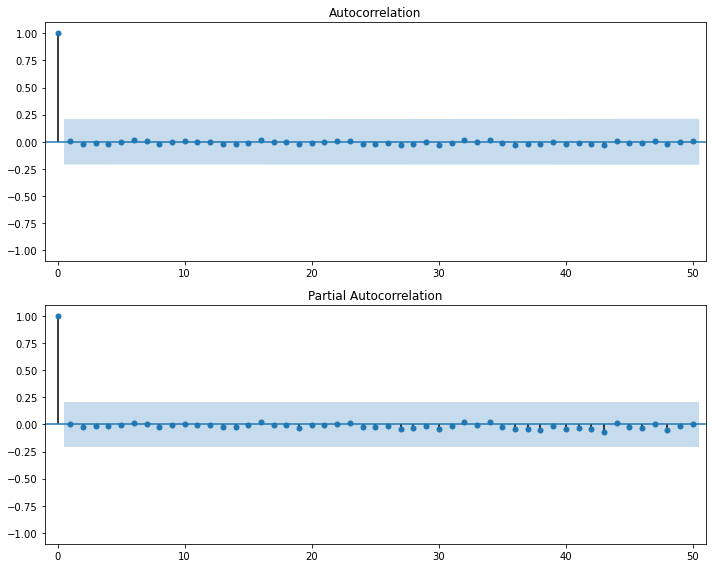

In [29]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, use_vlines=True, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, use_vlines=True, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(123)
y2 = sm.tsa.ArmaProcess([1], [1, 0.6]).generate_sample(100).cumsum().cumsum()
y1 = np.diff(y2)
y0 = np.diff(y1)

In [2]:
y2

array([  -1.0856306 ,   -1.82529412,   -1.68357187,   -2.87835724,
         -5.55551969,   -6.92840575,   -9.73710914,  -14.43073269,
        -18.11576757,  -21.90798109,  -26.89912501,  -32.39230959,
        -36.45092992,  -40.25361847,  -44.88363018,  -50.21438235,
        -53.59981519,  -53.4749039 ,  -51.03386705,  -47.60421147,
        -43.20547547,  -36.8735863 ,  -30.58309178,  -23.67826853,
        -17.32182853,  -12.35546843,   -6.86465403,   -2.25825722,
          1.35086245,    4.01418599,    5.90483723,    4.84352774,
          0.33153168,   -5.94326148,  -11.71051855,  -17.09493384,
        -22.58068462,  -27.37650514,  -32.63892838,  -38.1454461 ,
        -44.28715395,  -52.6397512 ,  -62.41984994,  -71.86068269,
        -80.61864288,  -89.18528013,  -95.36665041,  -99.69968937,
       -102.80624503, -103.08741575, -103.31978578, -105.36739522,
       -106.29456536, -106.97357091, -108.10173086, -108.1427649 ,
       -106.65150298, -102.87093103,  -96.54178324,  -88.24585

In [3]:
y1

array([-0.73966352,  0.14172225, -1.19478537, -2.67716245, -1.37288606,
       -2.80870338, -4.69362356, -3.68503488, -3.79221352, -4.99114392,
       -5.49318458, -4.05862033, -3.80268855, -4.63001171, -5.33075216,
       -3.38543284,  0.12491129,  2.44103685,  3.42965558,  4.398736  ,
        6.33188917,  6.29049452,  6.90482324,  6.35644   ,  4.9663601 ,
        5.49081439,  4.60639681,  3.60911967,  2.66332354,  1.89065124,
       -1.06130949, -4.51199606, -6.27479316, -5.76725707, -5.38441529,
       -5.48575078, -4.79582052, -5.26242324, -5.50651772, -6.14170785,
       -8.35259725, -9.78009874, -9.44083275, -8.75796019, -8.56663725,
       -6.18137028, -4.33303896, -3.10655566, -0.28117072, -0.23237004,
       -2.04760944, -0.92717014, -0.67900554, -1.12815995, -0.04103404,
        1.49126193,  3.78057194,  6.32914779,  8.29592694,  8.16485383,
        8.49609127,  9.28728086,  8.1495786 ,  8.77111837, 10.42873433,
       10.95856634, 10.75276832,  9.41461194,  8.89515533,  9.48

In [4]:
y0

array([ 0.88138577, -1.33650762, -1.48237708,  1.30427639, -1.43581732,
       -1.88492017,  1.00858868, -0.10717865, -1.19893039, -0.50204066,
        1.43456424,  0.25593178, -0.82732316, -0.70074045,  1.94531932,
        3.51034414,  2.31612555,  0.98861874,  0.96908042,  1.93315317,
       -0.04139465,  0.61432872, -0.54838324, -1.3900799 ,  0.52445429,
       -0.88441758, -0.99727714, -0.94579613, -0.77267231, -2.95196073,
       -3.45068657, -1.7627971 ,  0.50753609,  0.38284178, -0.10133549,
        0.68993026, -0.46660272, -0.24409448, -0.63519012, -2.2108894 ,
       -1.42750149,  0.33926599,  0.68287257,  0.19132294,  2.38526697,
        1.84833132,  1.2264833 ,  2.82538494,  0.04880068, -1.8152394 ,
        1.1204393 ,  0.2481646 , -0.44915441,  1.08712591,  1.53229597,
        2.28931002,  2.54857585,  1.96677915, -0.13107311,  0.33123744,
        0.7911896 , -1.13770226,  0.62153977,  1.65761596,  0.529832  ,
       -0.20579801, -1.33815638, -0.51945661,  0.58815356, -0.55

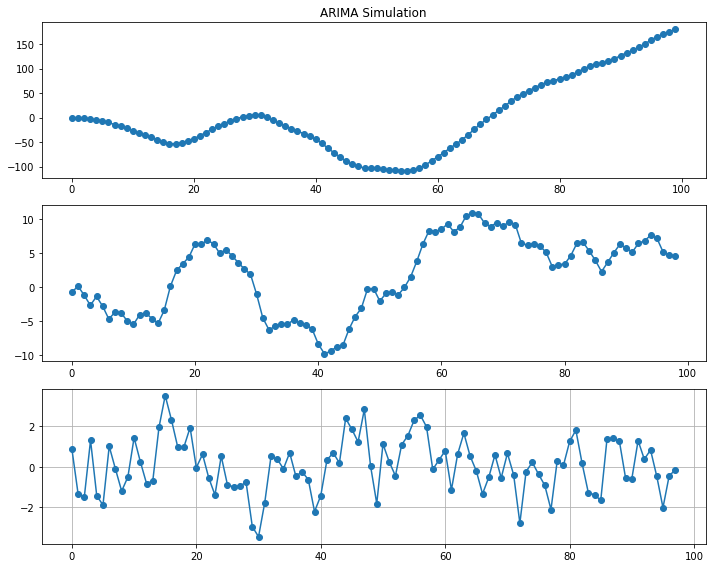

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.title("ARIMA Simulation")
plt.plot(y2, 'o-')
plt.subplot(312)
plt.plot(y1, 'o-')
plt.subplot(313)
plt.plot(y0, 'o-')
plt.tight_layout()
plt.grid()
plt.show()

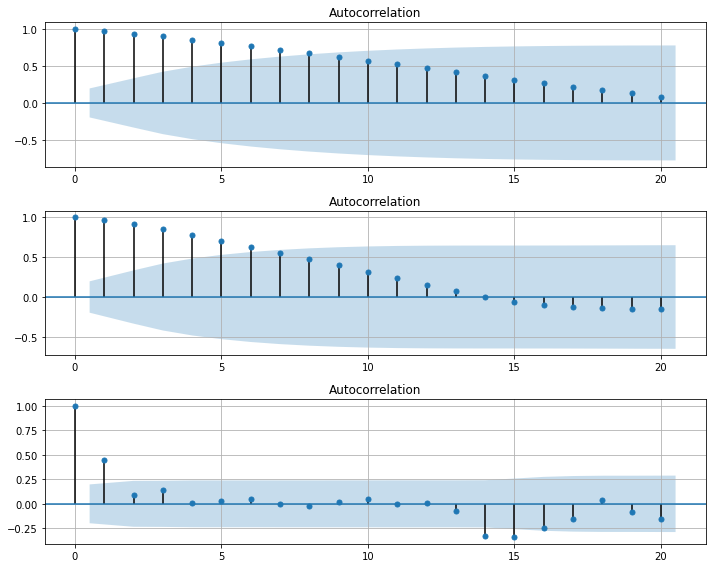

In [7]:
plt.figure(figsize=(10,8))
sm.tsa.graphics.plot_acf(y2, ax=plt.subplot(311))
plt.grid()
sm.graphics.tsa.plot_acf(y1, ax=plt.subplot(312))
plt.grid()
sm.tsa.graphics.plot_acf(y0, ax=plt.subplot(313))
plt.grid()
plt.tight_layout()
plt.show()

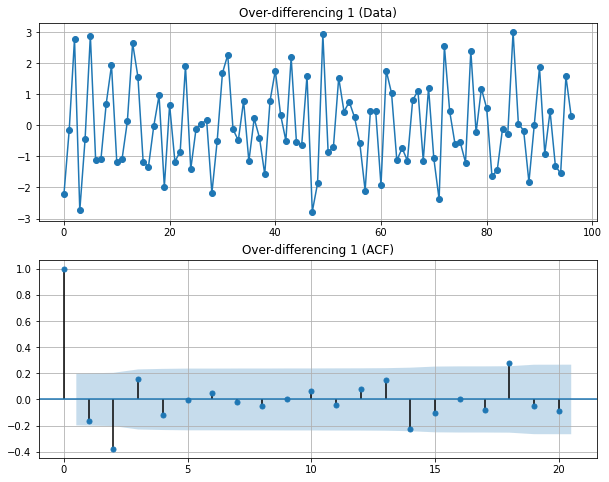

In [8]:
y1_minus = np.diff(y0)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y1_minus, 'o-')
plt.title("Over-differencing 1 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y1_minus, ax=plt.subplot(212))
plt.title("Over-differencing 1 (ACF)")
plt.grid()
plt.show()

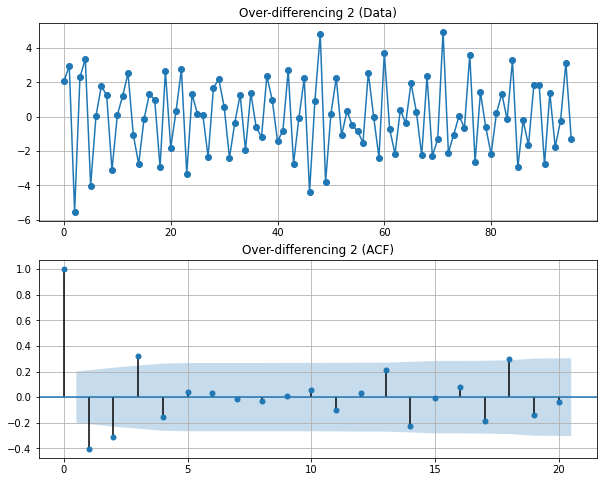

In [9]:
y2_minus = np.diff(y1_minus)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y2_minus, 'o-')
plt.title("Over-differencing 2 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y2_minus, ax=plt.subplot(212))
plt.title("Over-differencing 2 (ACF)")
plt.grid()
plt.show()

In [12]:
import pandas as pd
import numpy as np
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

In [14]:
y2

array([  -1.0856306 ,   -1.82529412,   -1.68357187,   -2.87835724,
         -5.55551969,   -6.92840575,   -9.73710914,  -14.43073269,
        -18.11576757,  -21.90798109,  -26.89912501,  -32.39230959,
        -36.45092992,  -40.25361847,  -44.88363018,  -50.21438235,
        -53.59981519,  -53.4749039 ,  -51.03386705,  -47.60421147,
        -43.20547547,  -36.8735863 ,  -30.58309178,  -23.67826853,
        -17.32182853,  -12.35546843,   -6.86465403,   -2.25825722,
          1.35086245,    4.01418599,    5.90483723,    4.84352774,
          0.33153168,   -5.94326148,  -11.71051855,  -17.09493384,
        -22.58068462,  -27.37650514,  -32.63892838,  -38.1454461 ,
        -44.28715395,  -52.6397512 ,  -62.41984994,  -71.86068269,
        -80.61864288,  -89.18528013,  -95.36665041,  -99.69968937,
       -102.80624503, -103.08741575, -103.31978578, -105.36739522,
       -106.29456536, -106.97357091, -108.10173086, -108.1427649 ,
       -106.65150298, -102.87093103,  -96.54178324,  -88.24585

In [19]:
sm.tsa.acf(y2, nlags=20)

array([1.        , 0.97013652, 0.93612789, 0.89831312, 0.85714474,
       0.81360759, 0.76823174, 0.72115792, 0.67267851, 0.62280521,
       0.5721078 , 0.52116581, 0.47001741, 0.41864158, 0.3670243 ,
       0.31604721, 0.26642892, 0.21876905, 0.17315914, 0.12913753,
       0.08640705])

,time,value,month
67,1978-08-31,9827,8
68,1978-09-30,9110,9
69,1978-10-31,9070,10
70,1978-11-30,8633,11
71,1978-12-31,9240,12


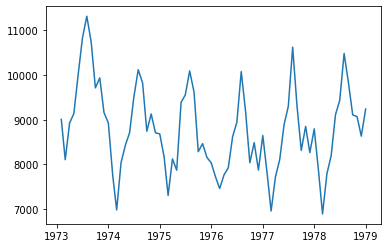

,Stationarity_adf
Test Statistics,-2.54
p-value,0.11
Used Lag,12.00
Used Observations,59.00
Critical Value(1%),-3.55
Maximum Information Criteria,870.44


,Stationarity_kpss
Test Statistics,0.28
p-value,0.10
Used Lag,12.00
Critical Value(10%),0.35


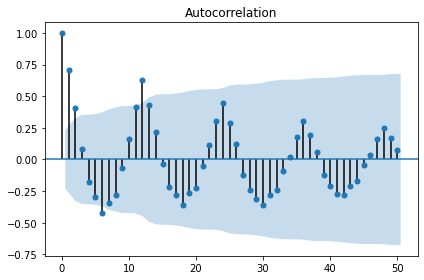

In [21]:
raw_set = datasets.get_rdataset("accdeaths", package="MASS")
raw = raw_set.data
raw.time = pd.date_range('1973-01-01', periods=len(raw), freq='M')
raw['month'] = raw.time.dt.month

display(raw.tail())
plt.plot(raw.time, raw.value)
plt.show()

display(stationarity_adf_test(raw.value, []))
display(stationarity_kpss_test(raw.value, []))
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

In [24]:
sm.tsa.stattools.adfuller(raw.value)

(-2.5389020843816628,
 0.10629360006170174,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 870.4354018251039)

In [25]:
sm.tsa.stattools.kpss(raw.value)

(0.2797919022764147,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [26]:
raw.time

0    1973-01-31
1    1973-02-28
2    1973-03-31
3    1973-04-30
4    1973-05-31
        ...    
67   1978-08-31
68   1978-09-30
69   1978-10-31
70   1978-11-30
71   1978-12-31
Name: time, Length: 72, dtype: datetime64[ns]

In [27]:
raw.time.dt.month

0      1
1      2
2      3
3      4
4      5
      ..
67     8
68     9
69    10
70    11
71    12
Name: time, Length: 72, dtype: int64

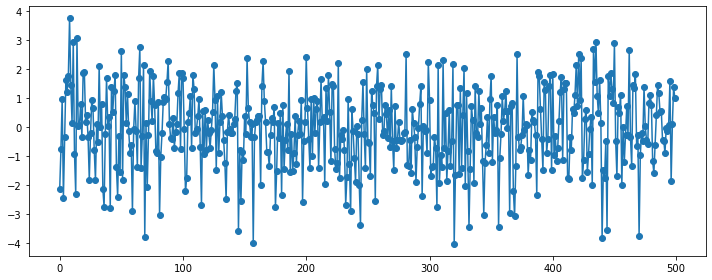

In [36]:
plt.figure(figsize=(10,4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0,0,0,0,0,0,0,0,0,0,0,0.95])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

In [37]:
ar, ma

(array([1.]),
 array([1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.95]))

Text(0.5, 1.0, 'ACF')

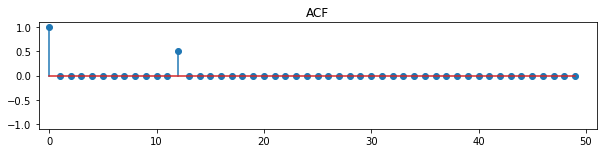

In [38]:
plt.figure(figsize=(10,9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar,ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

Text(0.5, 1.0, 'PACF')

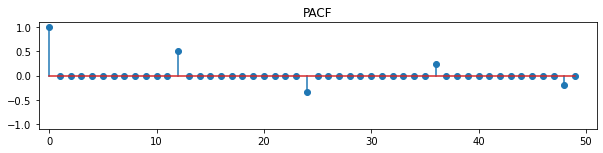

In [39]:
plt.figure(figsize=(10,9))
plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar,ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")

Text(0.5, 1.0, 'sample ACF')

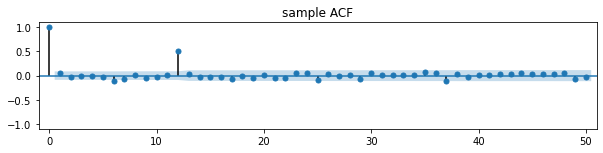

In [40]:
plt.figure(figsize=(10,9))
sm.tsa.graphics.plot_acf(y, lags=50, use_vlines=True ,ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("sample ACF")

Text(0.5, 1.0, 'sample PACF')

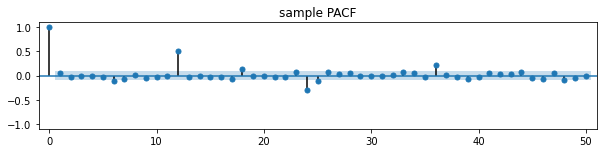

In [41]:
plt.figure(figsize=(10,9))
sm.tsa.graphics.plot_pacf(y, lags=50, use_vlines=True, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("sample PACF")

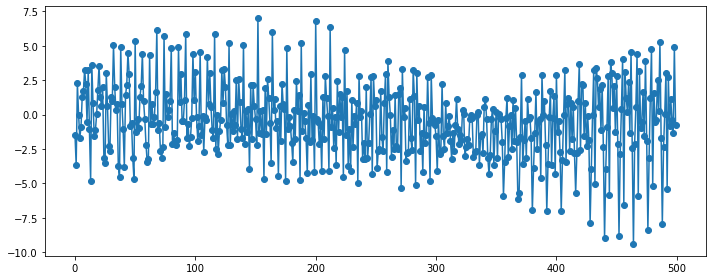

In [5]:
plt.figure(figsize=(10,4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

In [6]:
y

array([-1.46115369e+00, -3.65801497e+00,  2.27223780e+00,  2.91855581e-03,
       -1.68806276e+00, -9.29540582e-01,  1.27687174e+00,  1.68415891e+00,
        3.25010841e+00,  2.23593840e+00, -5.40681101e-01,  3.24676487e+00,
       -1.07382401e+00, -4.80137968e+00,  3.57592495e+00,  8.10009163e-01,
       -1.55816954e+00, -1.11615561e+00,  1.47270088e-02,  1.79947503e+00,
        3.55604211e+00,  1.29298649e+00,  6.48557003e-01,  1.98722358e+00,
       -3.14323316e+00, -3.52158360e+00,  2.99376267e+00,  6.43479119e-01,
       -2.31777778e+00, -2.66631059e+00,  1.26922803e+00,  1.02063230e+00,
        5.03919249e+00,  2.03564536e+00,  3.01371006e-01,  8.01959997e-01,
       -3.71853349e+00, -4.55802756e+00,  4.93118789e+00,  7.75746393e-01,
       -1.05168335e+00, -3.80034711e+00,  1.38680176e+00,  2.14746262e+00,
        4.45222210e+00,  2.96497755e+00, -7.98265456e-01, -6.01609547e-01,
       -3.15320620e+00, -4.70930261e+00,  5.32668319e+00, -1.24092886e+00,
       -2.86834548e-01, -

In [43]:
ar, ma

(array([ 1.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  , -0.  , -0.  , -0.95]),
 array([1.]))

Text(0.5, 1.0, 'Theoretical ACF of an SARIMA process')

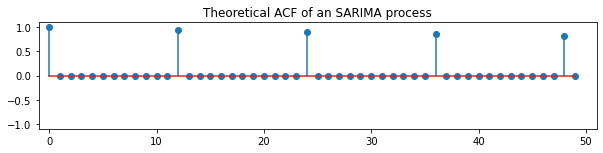

In [46]:
plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar,ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

Text(0.5, 1.0, 'Theoretical ACF of an SARIMA process')

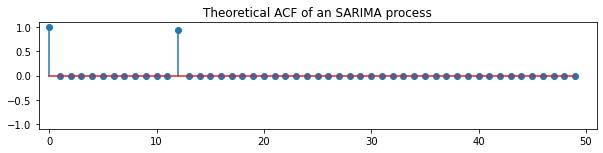

In [48]:
plt.figure(figsize=(10,9))
plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar,ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

In [4]:
plt.figure(figsize=(10,9))
sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

NameError: name 'y' is not defined

<Figure size 720x648 with 0 Axes>

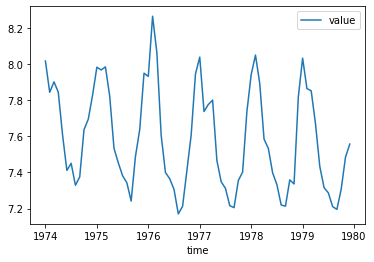

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = sm.datasets.get_rdataset('deaths', 'MASS')
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time', y='value')
plt.show()

In [2]:
raw.value

0     8.017967
1     7.844633
2     7.902487
3     7.845416
4     7.607878
        ...   
67    7.210818
68    7.195187
69    7.307873
70    7.484930
71    7.557473
Name: value, Length: 72, dtype: float64

In [3]:
raw.value.values

array([8.0179667 , 7.84463264, 7.90248744, 7.84541604, 7.60787807,
       7.41155629, 7.4506608 , 7.32909374, 7.37525578, 7.63723439,
       7.69575799, 7.82883453, 7.98378107, 7.9686657 , 7.98548436,
       7.82284529, 7.53369371, 7.45356187, 7.38212437, 7.34277919,
       7.24136628, 7.48829352, 7.63819824, 7.95050243, 7.93272103,
       8.26642147, 8.06432196, 7.60638739, 7.40000952, 7.36518013,
       7.30586003, 7.17011954, 7.21229447, 7.4103471 , 7.60738143,
       7.94555543, 8.03980234, 7.7380523 , 7.7769544 , 7.80139132,
       7.46622756, 7.34858753, 7.31188616, 7.215975  , 7.20489251,
       7.35500192, 7.40245152, 7.73761628, 7.94271754, 8.05102221,
       7.89319887, 7.58528108, 7.53369371, 7.39817409, 7.33236921,
       7.21964204, 7.21303166, 7.3588309 , 7.33628566, 7.82043952,
       8.03398273, 7.86518795, 7.85282781, 7.669962  , 7.43425738,
       7.3158835 , 7.28687641, 7.21081845, 7.19518732, 7.30787278,
       7.48493028, 7.5574729 ])

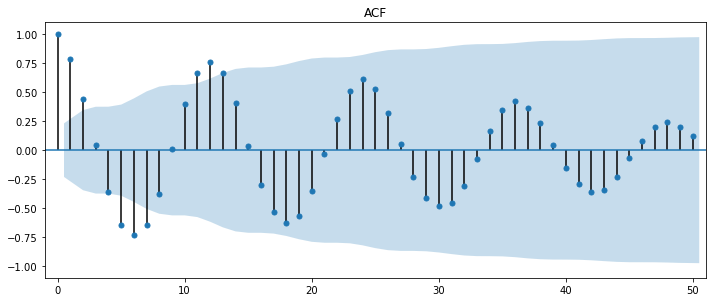

In [8]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_acf(raw.value.values, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('ACF')
plt.tight_layout()
plt.show()

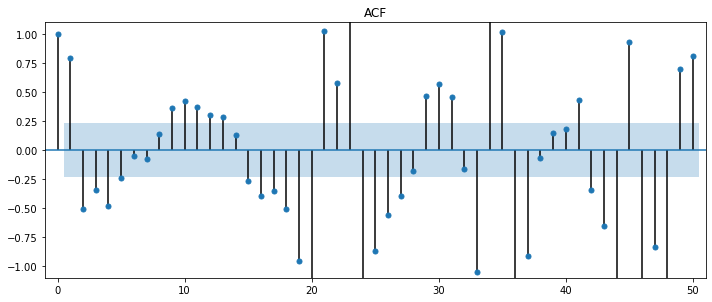

In [26]:
plt.figure(figsize=(10,8))
sm.graphics.tsa.plot_pacf(raw.value, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title('ACF')
plt.tight_layout()
plt.show()

In [11]:
sm.tsa.stattools.adfuller(raw.value.values)

(-0.6964948693899612,
 0.8476553578247106,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 -80.68569982105137)

In [27]:
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  31.983
Date:                Thu, 14 Jan 2021   AIC                            -55.965
Time:                        07:56:30   BIC                            -46.859
Sample:                             0   HQIC                           -52.340
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4382      0.767      3.181      0.001       0.936       3.941
ar.L1          0.6793      0.100      6.810      0.000       0.484       0.875
ma.L1          0.4685      0.116      4.036      0.000       0.241       0.696
sigma2         0.0236      0.004      5.407      0.000       0.015       0.032
===================================================================================
Ljung-Box (Q):                      161.43   Jarque-Bera (JB):                12.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.94
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

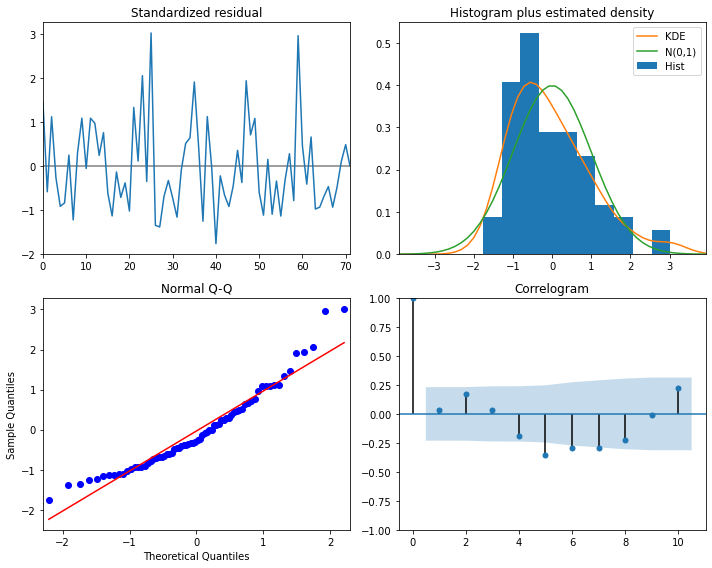

In [33]:
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [34]:
import seaborn as sns

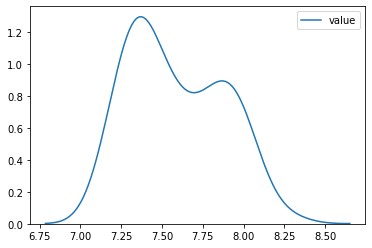

In [35]:
sns.kdeplot(raw.value)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  52.593
Date:                            Thu, 14 Jan 2021   AIC                            -93.186
Time:                                    08:10:30   BIC                            -80.620
Sample:                                         0   HQIC                           -88.270
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0478      0.022     -2.211      0.027      -0.090      -0.005
ar.L1         -0.1508      0.433     -0.348      0.728      -1.000       0.698
ma.L1          0.5681      0.271      2.096      0.036       0.037       1.099
ar.S.L12      -0.2870      0.203     -1.411      0.158      -0.686       0.112
ma.S.L12      -0.9818      8.010     -0.123      0.902     -16.681      14.717
sigma2         0.0065      0.051      0.127      0.899      -0.093       0.106
===================================================================================
Ljung-Box (Q):                       28.56   Jarque-Bera (JB):                74.47
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.99
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

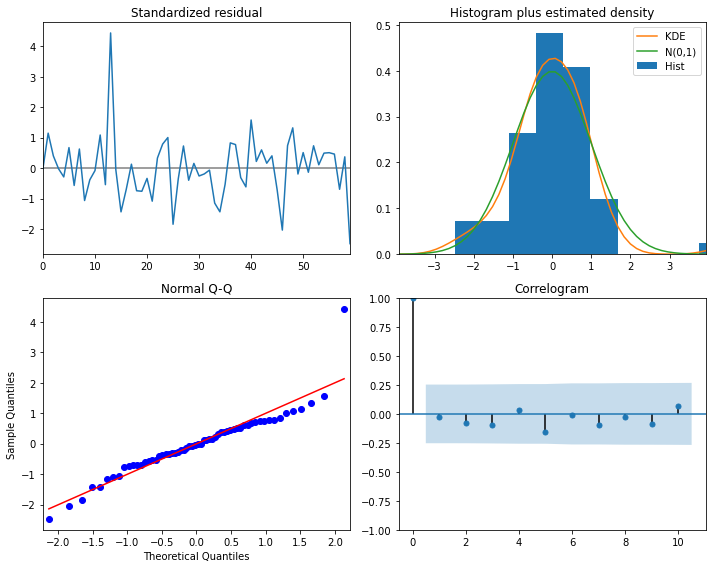

In [39]:
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary())

fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

In [44]:
raw

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [45]:
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

In [46]:
raw

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


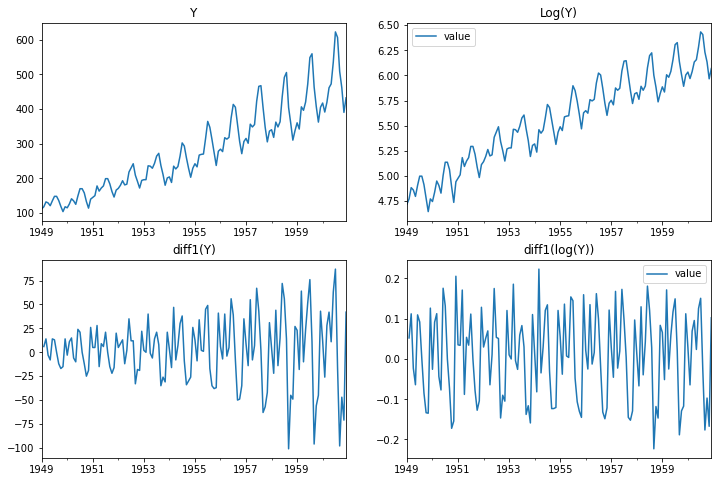

In [48]:
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='Log(Y)', legend=True)
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -694.060
Date:                Thu, 14 Jan 2021   AIC                           1396.121
Time:                        08:41:00   BIC                           1407.972
Sample:                    01-31-1949   HQIC                          1400.937
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6201      5.001      0.724      0.469      -6.182      13.422
ar.L1         -0.4768      0.128     -3.736      0.000      -0.727      -0.227
ma.L1          0.8646      0.080     10.747      0.000       0.707       1.022
sigma2       958.4384    107.047      8.953      0.000     748.630    1168.247
===================================================================================
Ljung-Box (Q):                      318.10   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               7.01   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

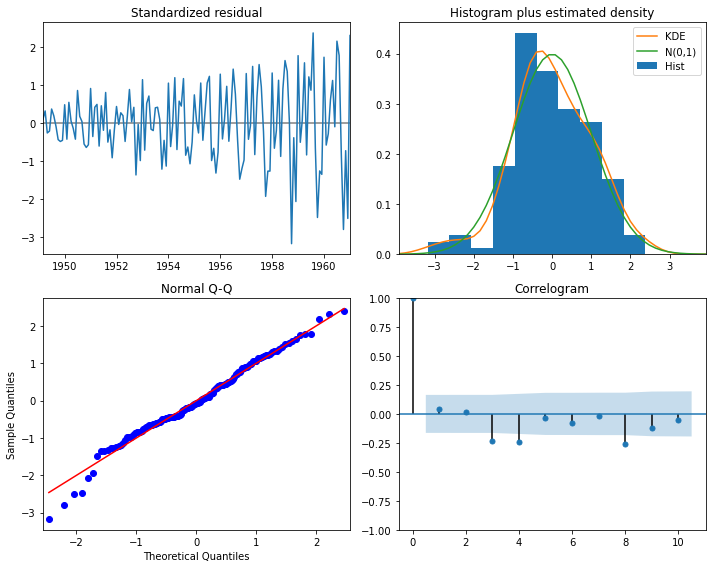

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 124.804
Date:                Thu, 14 Jan 2021   AIC                           -241.608
Time:                        08:41:01   BIC                           -229.756
Sample:                    01-31-1949   HQIC                          -236.792
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.016      0.963      0.336      -0.016       0.047
ar.L1         -0.5826      0.170     -3.430      0.001      -0.916      -0.250
ma.L1          0.8502      0.101      8.456      0.000       0.653       1.047
sigma2         0.0102      0.002      5.871      0.000       0.007       0.014
===================================================================================
Ljung-Box (Q):                      355.82   Jarque-Bera (JB):                 5.92
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

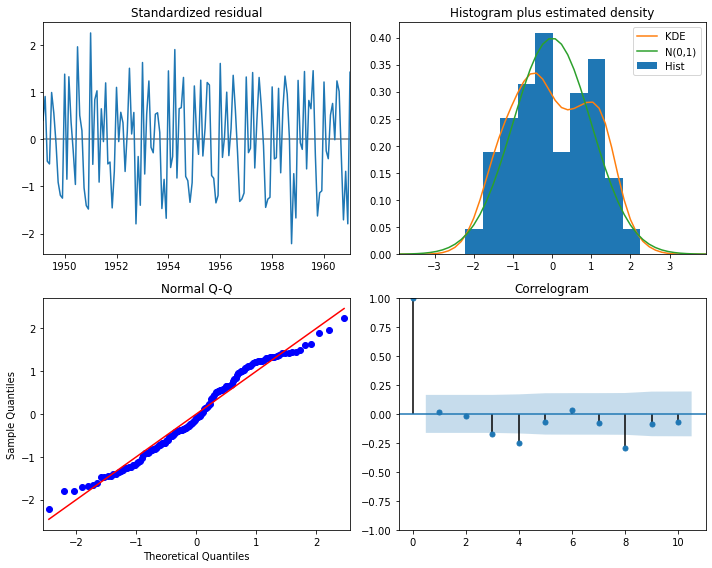

In [53]:
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x0000012306508A00>>

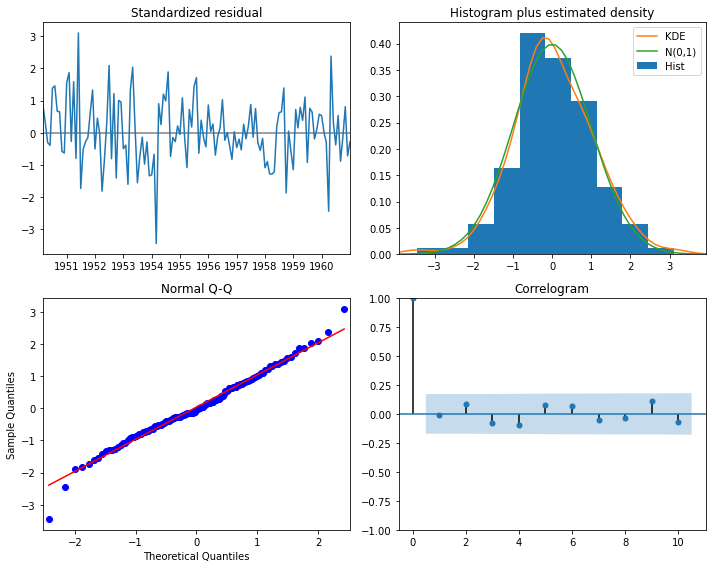

In [56]:
fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary)

fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


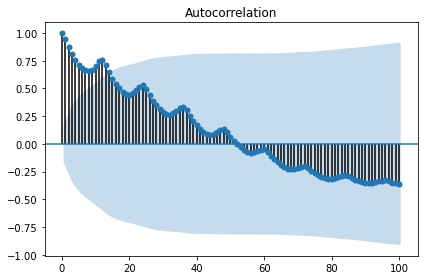

In [8]:
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

candidate_none = raw.copy()
display(stationarity_adf_test(candidate_none.values.flatten(), []))
display(stationarity_kpss_test(candidate_none.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


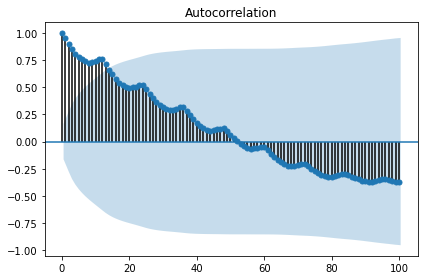

In [13]:
candidate_trend = np.log(raw).copy()
display(stationarity_adf_test(candidate_trend.values.flatten(), []))
display(stationarity_kpss_test(candidate_trend.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_trend.values.flatten(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

In [14]:
trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T

In [25]:
if result['p-value'].values.flatten() < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

Trend Difference:  1


In [23]:
result['p-value'].values.flatten()

array([0.42236677])

,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36


,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


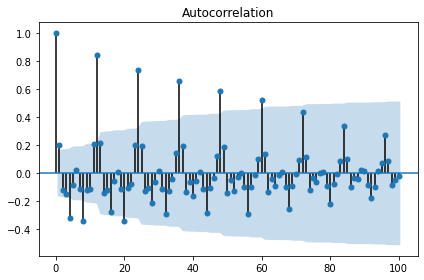

In [27]:
candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_seasonal.values.flatten(), []))
display(stationarity_kpss_test(candidate_seasonal.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_seasonal, lags = 100, use_vlines=True)
plt.tight_layout()
plt.show()

In [28]:
seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
print('Seasonal Difference: ', seasonal_diff_order)

Seasonal Difference:  12


In [29]:
sm.tsa.acf(candidate_seasonal)

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439, -0.1073849 , -0.0752112 ,  0.19947518,  0.7369207 ,
        0.19726236, -0.1238843 , -0.10269904, -0.21099219, -0.06535684,
        0.01572846, -0.11537038, -0.28925562, -0.12688236, -0.04070684,
        0.14741061,  0.6574381 ,  0.19290864, -0.13431247, -0.06023711,
       -0.1627056 ])

In [30]:
sm.tsa.acf(candidate_seasonal)[1:]

array([ 0.19975134, -0.12010433, -0.15077204, -0.32207432, -0.08397453,
        0.02577843, -0.11096075, -0.33672146, -0.11558631, -0.10926704,
        0.20585223,  0.84142998,  0.21508704, -0.13955394, -0.11599576,
       -0.27894284, -0.05170646,  0.01245814, -0.1143576 , -0.33717439,
       -0.1073849 , -0.0752112 ,  0.19947518,  0.7369207 ,  0.19726236,
       -0.1238843 , -0.10269904, -0.21099219, -0.06535684,  0.01572846,
       -0.11537038, -0.28925562, -0.12688236, -0.04070684,  0.14741061,
        0.6574381 ,  0.19290864, -0.13431247, -0.06023711, -0.1627056 ])

In [31]:
sm.tsa.acf(candidate_seasonal)[1:].argmax()

11

In [32]:
sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1

12

,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56


,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


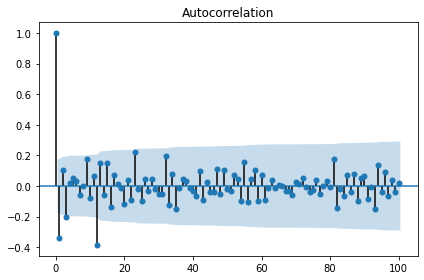

In [34]:
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(), []))
display(stationarity_kpss_test(candidate_final.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()